# Ejercicio 3

In [2]:
import pandas as pd
df = pd.read_csv("databases/graduados.txt", sep="\t", header=None)
df.columns = ["GPA"]
df.head()

,GPA
0,3.46
1,3.72
2,3.95
3,3.55
4,3.62


a) Calcular la media muestral y la mediana muestral

In [5]:
# Media muestral
media = df["GPA"].mean()

# Mediana muestral
mediana = df["GPA"].median()

print("Media: ", media)
print("Mediana: ", mediana)

Media:  3.7206666666666663
Mediana:  3.72


b) Calcular el desvío estándar muestral y la distancia intercuartil.

Definimos así el desvío estándar muestral
$$s² = \frac {\sum_{i=1}^{n} (x_{i} - \bar{x_{n}})²}{(n-1)}$$

Definimos así la distancia intercuartil
$$IQR = Q_{3} - Q_{1}$$


In [6]:
# Desvío estándar muestral
desvio = df["GPA"].var()

# Distancia intercuartil
iqr = df["GPA"].quantile(0.75) - df["GPA"].quantile(0.25)

print("Desvío estándar muestral: ", desvio)
print("Distancia intercuartil: ", iqr)

Desvío estándar muestral:  0.021220229885057475
Distancia intercuartil:  0.20000000000000018


c)  Realizar un histograma con los datos y superponga la curva de una densidad
normal con los parámetros que considere pertinentes

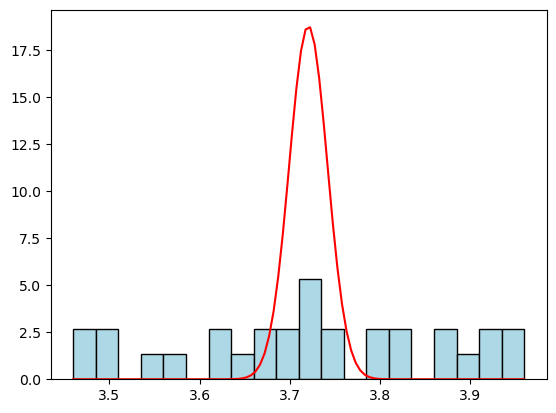

In [28]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

# Histograma
plt.hist(df["GPA"], bins=20, density=True, color="lightblue", edgecolor="black")

# Curva de densidad normal con parametros media y desvio

# define el eje x, con 100 puntos entre el mínimo y el máximo
x = np.linspace(df["GPA"].min(), df["GPA"].max(), 100)
# calcula la función de densidad normal para cada valor de x
y = stats.norm.pdf(x, loc=media, scale=desvio)


plt.plot(x, y, color="red")
plt.show()



d) Realice un boxplot con este conjunto de datos. ¿Cuáles son sus características
más sobresalientes? ¿Cómo relaciona lo observado en los gráficos con los valores
estimados de media y mediana obtenidos en a)? ¿Hay outliers?

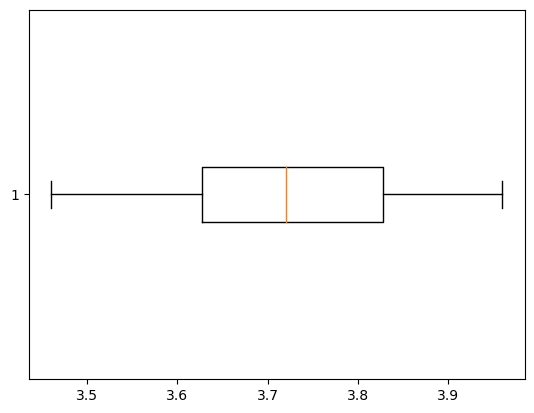

In [33]:
# Boxplot de la variable GPA
plt.boxplot(df["GPA"], 
            vert=False)
plt.show()

No tengo mucha idea de cómo analizar el BoxPlot de arriba, tampoco de parámetros para pasarle a la función para que me tire más data, pero en base a lo visto antes con el histograma, me inclino a pensar en una normal. Para chequear normalidad, lo comparo con el QQPlot.

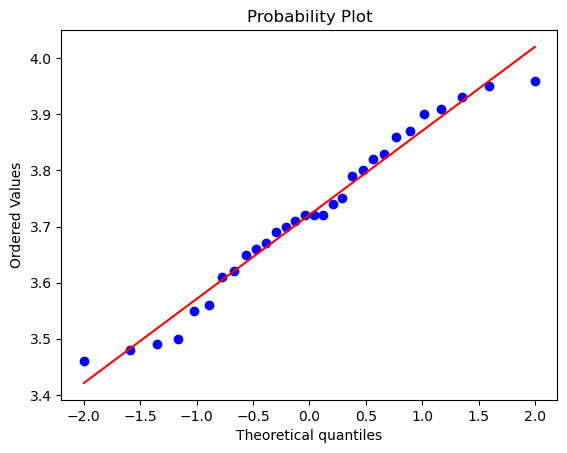

In [61]:
# Busco hacer el Quantile-Quantile plot de la variable GPA contra una normal con los parametros de la muestra
stats.probplot(df["GPA"], dist="norm", plot=plt)
plt.show()



Como podemos ver, la conjetura de que los datos están modelados por una normal es razonable, pues los cuantiles de una normal con los parámetros estimados se asemejan a nuestros datos. Si tuviésemos más datos, quizás se asemejaría más. 